In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('heart_v2.csv')

In [7]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [11]:
data.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [12]:
x=data.drop('heart disease',axis=1)
y=data['heart disease']

In [14]:
x

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [15]:
from sklearn.model_selection import train_test_split as tts


In [16]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=1)

In [17]:
x_train.shape,x_test.shape

((216, 4), (54, 4))

### Let's import Random Forest and fit the data

In [19]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [20]:
classifier_1=rfc(n_estimators= 100 , max_depth=5 ,oob_score=True , random_state=0 ,n_jobs=-1)


In [21]:
%%time
classifier_1.fit(x_train,y_train)

CPU times: user 277 ms, sys: 56 ms, total: 333 ms
Wall time: 367 ms


/home/wasim/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

In [22]:
classifier_1.oob_score_

0.6388888888888888

### Let's Do hyperparameter tunning using  GridSerchCV

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
classifier_2= rfc(n_jobs=-1,random_state=1)

In [46]:
para={
    'max_depth':[2,5,10,50,100,150],
    'min_samples_leaf':[2,5,7,50,100,200],
    'n_estimators':[5,10,30,50,100,200]
}

In [47]:
%%time
grid_serch=GridSearchCV(estimator=classifier_2,
                       param_grid=para,
                      cv=5,
                      n_jobs=-1, scoring="accuracy" ,verbose=1
                      )

CPU times: user 27 µs, sys: 2 µs, total: 29 µs
Wall time: 33.4 µs


In [48]:
%%time
grid_serch.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 1.77 s, sys: 66.4 ms, total: 1.84 s
Wall time: 1min 6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50, 100, 150],
                         'min_samples_leaf': [2, 5, 7, 50, 100, 200],
                         'n_estimators': [5, 10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [52]:
rfbest_estimator=grid_serch.best_estimator_
rfbest_estimator

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=1)

In [50]:
grid_serch.best_score_

0.6530655391120508

### visulization of tree

In [53]:
from sklearn.tree import plot_tree

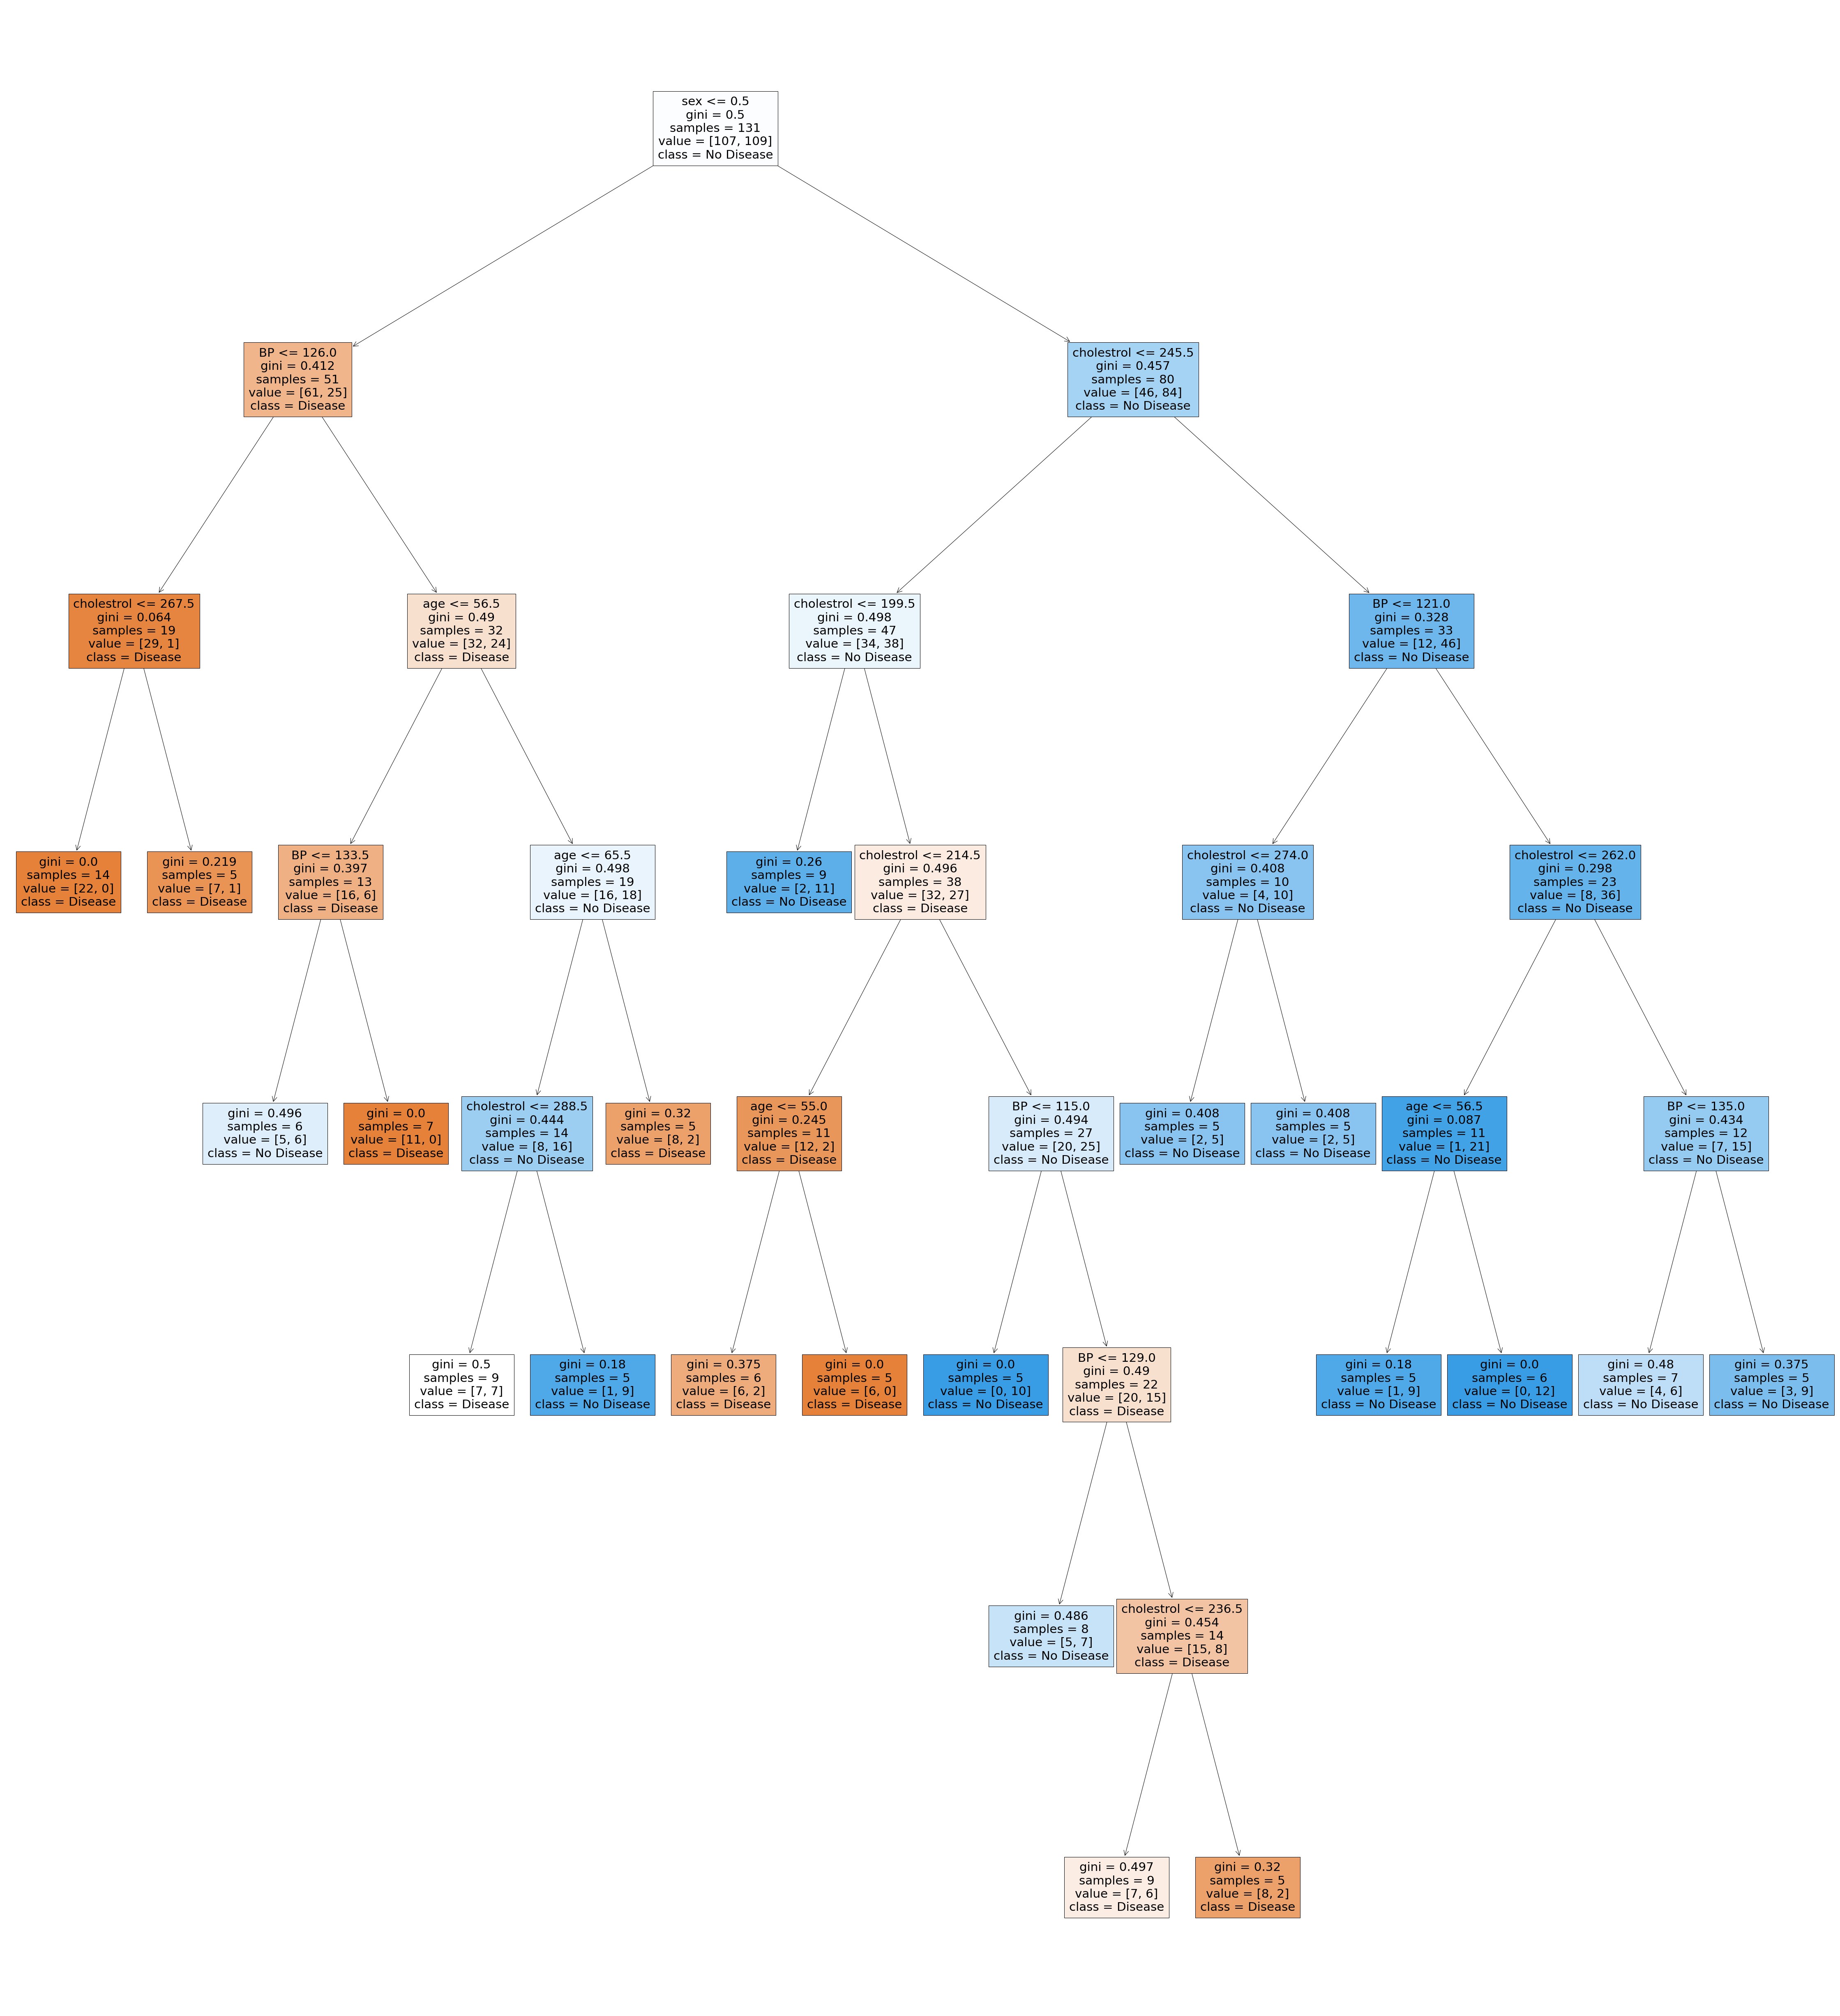

In [60]:
plt.figure(figsize=(80,90))
plot_tree(rfbest_estimator.estimators_[5] ,feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);


### Important Feature or Feature Selection

In [61]:
rfbest_estimator.feature_importances_

array([0.33314204, 0.17981886, 0.17053909, 0.31650002])

In [64]:
imp_fea=pd.DataFrame({
    'variable':x.columns,
    'imp': rfbest_estimator.feature_importances_
})

In [67]:
imp_fea.sort_values(by='imp',ascending= False)

,variable,imp
0,age,0.333142
3,cholestrol,0.316500
1,sex,0.179819
2,BP,0.170539


In [68]:
final_classifier=rfc(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=1)

In [69]:
final_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=1)

In [73]:
y_pred=final_classifier.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix

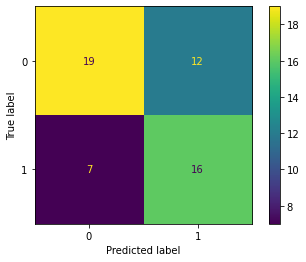

In [77]:
plot_confusion_matrix(final_classifier,x_test,y_test)